### Evaluation Metrics for Regression
- Regression Metrics
    - Mean absolute error(MAE)
        - measures the avg magnitude of errors without considering their direction 
        - use case: suitable when all errors have equal importance 
    - Mean squared error(MSE)
        - measures the avg of squared difference between actual and predicted values 
        - use case : penalizes larger errors more than MAE making it sensitive to outliers 
    - Root mean squared error (RMSE)
        - square root of mse, providing errors in the same units as the target variable
        - use case: a common metric for interpretability in real world units 
    - R-squared
        - measures how well the model explain the variability of the target variable 
        - use case : indicates the proportion of variance explained by the model
### Evaluation matrics for classification 
- Classification Metrics 
    - Accuracy
        - Percentage of correctly classified instances
        - use case: suitable for balanced satasets but misleading for imbalanced data 
    - Precision
        - Fraction of true positive predictions among all positive predications 
        - use case : important when false positives are costly(eg detection)
    - Recall(Sensitivity)
        - Fraction of true positives identified among all actual positives
        - use case : critical in situations where missing positives are costly(eg: Medical diagnosis)
    - F1 score
        - Harmonic mean of precision and recall 
        - use case : Useful for imbalanced datasets
    - ROC-AUC
        - measures the ability of the model to idstinguish between classes 
        - use case important for evaluating binary classifiers
### Understanding when to use each metric 
- Regression 
    - use MAE for interpretability and uniform importance of errors 
    - Use MSE/RMSE where larger errors need greater penalization 
    -use R square to explain variance but not as a sole performance metric 
- Classification
    - use accuracy for balanced datasets
    - use precision and recall for imbalanced datasets, depending on the problems focus (eg minimizing false +ve or false -ve )
    - use F1 score for balanced evaluation of precision and recall 
    - use Roc-Auc for overall model performance evaluation in binary classification 
    


## Exercise 1: Classification Model | Evaluation 
- Objective 
    - Train a classification model, calculate confusion matrix and interpret precision, recall and f1 score 
    

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
data = load_iris()
x = data.data
y = (data.target == 0).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


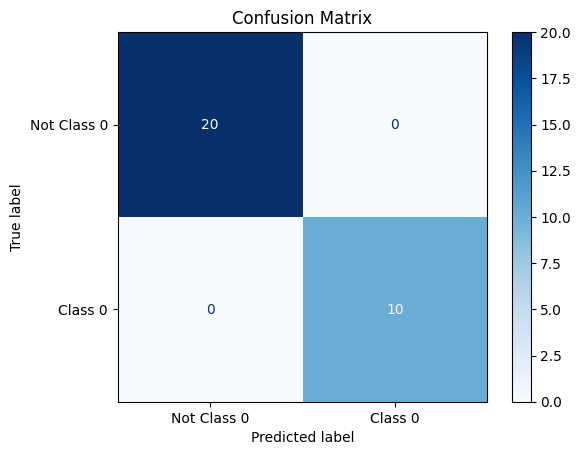

In [3]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Class 0","Class 0"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show() 


In [4]:
print("\n Classification Report: ")
print(classification_report(y_test, y_pred))


 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Exercise 2: Regression Model Evaluation
- Objective 
    - Train a regression model evaluate its performance using MAE, MSE, R square 

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
data = fetch_california_housing()
x,y = data.data, data.target

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


In [8]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

In [12]:
print(f"mean_absolute_error : {mae:.3f}")
print(f"mean_squared_error : {mse:.3f}")
print(f"r2_score : {r2:.2f}")

mean_absolute_error : 0.533
mean_squared_error : 0.556
r2_score : 0.58
